**Load .npy files into splits by using np.load function**

In [ ]:
import numpy as np
X_train, X_test, y_train, y_test = np.load('X_train.npy'), np.load('X_test.npy'), np.load('y_train.npy'), np.load('y_test.npy')

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((559, 8), (140, 8), (559,), (140,))

**TensorFlow**

TensorFlow is a Python-based, free, open-source machine learning platform, developed by Google.

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.6.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**Keras**

Keras is a deep-learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep-learning model.




In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


**Sequential:**
There are three APIs for building models in Keras. One of them is Sequential. The Sequential class indicates that our network will be feedforward and layers will be added to the class sequentially, one on top of the other.

**Layer:** The core building block of neural networks. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form.

**Dense layer:** are densely connected also called fully connected neural layers.

**Regularization:** 
The goal of regularization is to fit the model perfectly to the training data, with the goal of making the model perform better during validation. **DropOut:**
Dropout is one of the most effective and most commonly used regularization techniques for neural networks. It is applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training.

**BatchNormalization:**

It’s a type of layer. Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

In [ ]:
def create_model(num_neurons=5, num_layers=1, activation= 'relu', drop_ratio=0.2):
    model = Sequential()
    model.add(Dense(num_neurons, activation = 'relu', input_shape = (X_train.shape[1],)))
    model.add(Dropout(drop_ratio))
    for i in range(num_layers-1):
        model.add(BatchNormalization())
        model.add(Dense(num_neurons, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    return model

To make the model ready for training, we need to pick three more things, as part of the compilation step:

**Optimizer**—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance. ***Adam:*** is a stochastic gradient descent method.

**Loss function**—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction. ***binary_crossentropy:*** is used for binary (0 or 1) classification.


**Metrics** to monitor during training and testing— Here, we’ll only care about accuracy. The fraction of the input data that were correctly classified.

**Model Training:** 
We’re now ready to train the model, which in Keras is done via a call to the model’s fit() method. We fit the model to its training data.
Two quantities are displayed during training: the loss of the model over the training data, and the accuracy of the model over the training data.

**Evaluate Model:** 

On average, how good is our model at classifying never-seen-before data, We can check by computing average accuracy over the entire test set by calling model.evaluate() function.




In [ ]:
for i in range(1,10):
    for j in range(5,31,5):
        model= create_model(num_neurons=j, num_layers=i)
        model.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, batch_size=80, epochs=300, verbose = 0, validation_split = 0.1)
        loss, acc = model.evaluate(X_test, y_test)
        print('Test accuracy:', acc)
        print('Test loss', loss)
        plt.plot(history.history['loss'], label= 'training')
        plt.plot(history.history['val_loss'], label= 'validation')
        plt.legend()
        plt.show()

Dropout:  0.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
batch_normalization_2 (Batch (None, 20)   

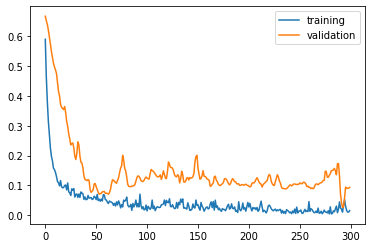

Dropout:  0.1
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                180       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 20)                80        
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_8 (Batch (None, 20)                80        
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_9 (Batch (None, 20) 

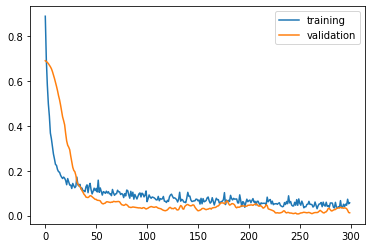

Dropout:  0.2
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                180       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 20)                80        
_________________________________________________________________
dense_19 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_15 (Batc (None, 20)                80        
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_16 (Batc (None, 20) 

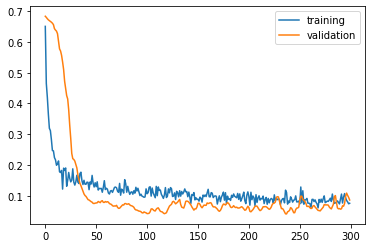

Dropout:  0.30000000000000004
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                180       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 20)                80        
_________________________________________________________________
dense_28 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_22 (Batc (None, 20)                80        
_________________________________________________________________
dense_29 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_23 (

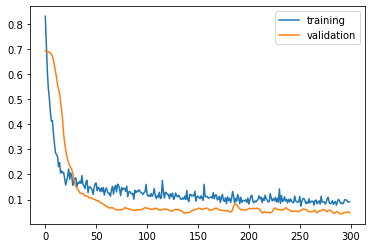

Dropout:  0.4
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 20)                180       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 20)                80        
_________________________________________________________________
dense_37 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_29 (Batc (None, 20)                80        
_________________________________________________________________
dense_38 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_30 (Batc (None, 20) 

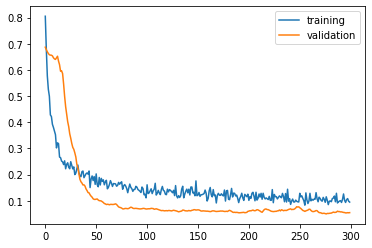

In [ ]:
for k in range(5):
    drop_ratio = k*0.1
    print('Dropout: ',drop_ratio)
    model= create_model(num_neurons=20, num_layers=8, drop_ratio = drop_ratio)
    model.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=80, epochs=300, verbose = 0, validation_split = 0.1)
    loss, acc = model.evaluate(X_test, y_test)
    print('Test accuracy:', acc)
    print('Test loss', loss)
    plt.plot(history.history['loss'], label= 'training')
    plt.plot(history.history['val_loss'], label= 'validation')
    plt.legend()
    plt.show()

In [ ]:
model= create_model(num_neurons=20, num_layers=8)
model.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=80, epochs=300, verbose = 0, validation_split = 0.1)
loss, acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc)
print('Test loss', loss)
plt.plot(history.history['loss'], label= 'training')
plt.plot(history.history['val_loss'], label= 'validation')
plt.legend()
plt.show()

When you’re training a model, there are many things you can’t predict from the start. In particular, you can’t tell how many epochs will be needed to get to an optimal validation loss. Our examples so far have adopted the strategy of training for enough epochs (i.e. 300) that you begin overfitting, using the first run to figure out the proper number of epochs to train for, and then finally launching a new training run from scratch using this optimal number. Of course, this
approach is wasteful. A much better way to handle this is to stop training when you measure that the validation loss is no longer improving. This can be achieved using the EarlyStopping callback.

**Early Stopping:**
The EarlyStopping callback interrupts training once a target metric being monitored has stopped improving for a fixed number of epochs.

**Patience**: Number of epochs with no improvement after which training will be stopped.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 20)                180       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 20)                80        
_________________________________________________________________
dense_46 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_36 (Batc (None, 20)                80        
_________________________________________________________________
dense_47 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_37 (Batc (None, 20)               

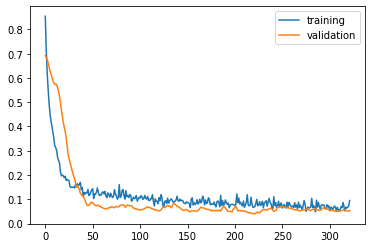

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience = 100)
model= create_model(num_neurons=20, num_layers=8)
model.compile(optimizer= 'adam',loss= 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=80, epochs=500, verbose = 2, validation_split = 0.1, callbacks=[es])
loss, acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc)
print('Test loss', loss)
plt.plot(history.history['loss'], label= 'training')
plt.plot(history.history['val_loss'], label= 'validation')
plt.legend()
plt.show()

In [ ]:
history = model.fit(X_train, y_train, batch_size=80, epochs=300, verbose = 0, validation_split = 0.1)

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Test accuracy:', acc)
print('Test loss', loss)

5/5 [==============================] - 0s 5ms/step - loss: 0.1268 - accuracy: 0.9571
Test accuracy: 0.9571428298950195
Test loss 0.1267630159854889


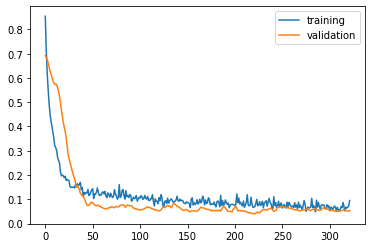

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label= 'training')
plt.plot(history.history['val_loss'], label= 'validation')
plt.legend()
plt.show()

**Prediction:**

Now that we have a trained model, you can use it to predict class probabilities for new data points that weren’t part of the training data, like those from the test set.

In [ ]:
row = X_test[5:100,:]
labels = y_test[5:100]
predictions = model.predict(row).round().reshape(labels.shape)
# print('Predicted: ', predictions)
# print('Labels: ', labels)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labels, predictions))

[[60  3]
 [ 1 31]]
